# 모두를 위한 딥러닝 : Pytorch
## Lecture 5 - Logistic Classification
본 문서는 모두를 위한 딥러닝 강의를 듣고 공부 목적으로 작성되었습니다.

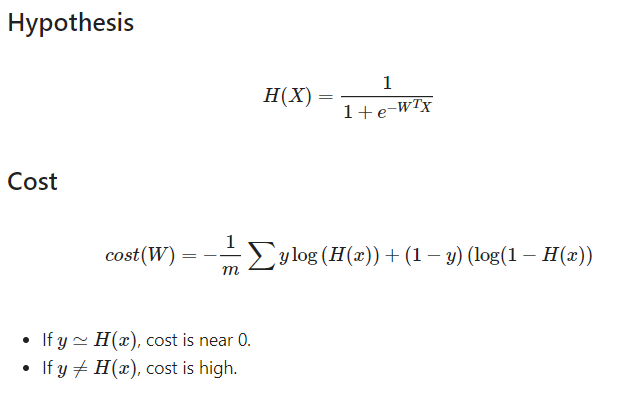

* Logistic Regression은 분류 문제에 주로 쓰인다.결과값은 확률값을 말한다. 정확히는 X=1이 될 확률을 말한다.
* Cost를 구하는 함구로는 cross-entropy함수를 사용한다.

### Weight Update via Gradient Descent
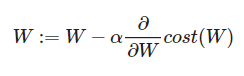

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

### Training Data

주어진 문제상황은 다음과 같다. x_data에는 학생들이 강의를 본 시간과, code lab에서 일한 시간이 주어져 있다. 이를 바탕으로 해당 학생이 합격했는지, 그렇지 않은지 분류하는 문제이다.

In [4]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [5]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [6]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


### Hypothesis

In [8]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

hypothesis = 1/(1+torch.exp(-x_train.matmul(W)+b))

In [9]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


또는 sigmoid함수를 통해 한번에 적용할 수 있다.

In [10]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)

In [11]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


### Cost Function

In [12]:
cost = -torch.mean(y_train*torch.log(hypothesis)+(1-y_train)*torch.log(hypothesis))

In [13]:
print(cost)

tensor(0.6931, grad_fn=<NegBackward0>)


이 또한 torch 함수 중 binary_cross_entropy를 통해 한 번에 구할 수 있다.

In [14]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

### Training with Low-level Binary Cross Entropy Loss

In [15]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = torch.mean(-(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [16]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


### Loading Real Data

In [17]:
import numpy as np

In [18]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [19]:
print(x_train[0:5])
print(y_train[0:5])

tensor([[-0.2941,  0.4874,  0.1803, -0.2929,  0.0000,  0.0015, -0.5312, -0.0333],
        [-0.8824, -0.1457,  0.0820, -0.4141,  0.0000, -0.2072, -0.7669, -0.6667],
        [-0.0588,  0.8392,  0.0492,  0.0000,  0.0000, -0.3055, -0.4927, -0.6333],
        [-0.8824, -0.1055,  0.0820, -0.5354, -0.7778, -0.1624, -0.9240,  0.0000],
        [ 0.0000,  0.3769, -0.3443, -0.2929, -0.6028,  0.2846,  0.8873, -0.6000]])
tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


In [20]:
print(x_train.shape)

torch.Size([759, 8])


### Training with Real Data using low-level Binary Cross Entropy Loss

In [22]:
# 모델 초기화
W = torch.zeros((8, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 10번마다 로그 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/100 Cost: 0.693147
Epoch   10/100 Cost: 0.572727
Epoch   20/100 Cost: 0.539493
Epoch   30/100 Cost: 0.519708
Epoch   40/100 Cost: 0.507066
Epoch   50/100 Cost: 0.498539
Epoch   60/100 Cost: 0.492549
Epoch   70/100 Cost: 0.488209
Epoch   80/100 Cost: 0.484985
Epoch   90/100 Cost: 0.482543
Epoch  100/100 Cost: 0.480661


### 학습시킨 모델 정확도 체크

In [23]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis[:5])

tensor([[0.4103],
        [0.9242],
        [0.2300],
        [0.9411],
        [0.1772]], grad_fn=<SliceBackward0>)


In [25]:
prediction = hypothesis >= torch.FloatTensor([0.5])
prediction[:5]

tensor([[False],
        [ True],
        [False],
        [ True],
        [False]])

In [29]:
correct_prediction = prediction==y_train
correct_prediction = correct_prediction.float()
print(correct_prediction)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
      

In [30]:
accuracy = torch.mean(correct_prediction)
print('The model has an accuracy of {:2.2f}% for the training set.'.format(accuracy.item() * 100))

The model has an accuracy of 76.68% for the training set.


### High Level Implementation with nn.Module

In [31]:
class BinaryClassification(nn.Module):
    def __init__(self, x: torch.tensor) -> None:
        super().__init__()
        self.linear = nn.Linear(x.shape[1],1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x:torch.tensor)->torch.tensor:
        return self.sigmoid(self.linear(x))

In [34]:
model = BinaryClassification(x_train)

In [37]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/100 Cost: 0.704829 Accuracy 45.72%
Epoch   10/100 Cost: 0.572392 Accuracy 67.59%
Epoch   20/100 Cost: 0.539564 Accuracy 73.25%
Epoch   30/100 Cost: 0.520041 Accuracy 75.89%
Epoch   40/100 Cost: 0.507561 Accuracy 76.15%
Epoch   50/100 Cost: 0.499125 Accuracy 76.42%
Epoch   60/100 Cost: 0.493177 Accuracy 77.21%
Epoch   70/100 Cost: 0.488846 Accuracy 76.81%
Epoch   80/100 Cost: 0.485612 Accuracy 76.28%
Epoch   90/100 Cost: 0.483146 Accuracy 76.55%
Epoch  100/100 Cost: 0.481234 Accuracy 76.81%
